In [4]:
# importing the required packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 1. Data Preparation

#### Reading the CSV file

In [5]:
# reading the csv file
data = pd.read_csv('train.csv')

In [124]:
# Getting a sense of the data using descriptive statistics
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Checking for class imbalance

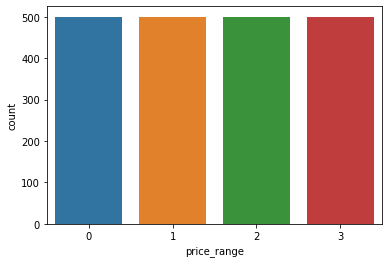

In [121]:
# Checking for class imbalance
sns.countplot(data.iloc[:,20])

The number of data points corresponding to each class is balanced.

#### Checking for null values in the dataset

In [6]:
# Checking for missing values
data.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Getting the rows with missing values
data[data.isnull().any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


There are no missing values in the dataset as no values got returned by the code above

#### Checking for outliers in the dataset

We will use z scores for detecting outliers. If any feature value lies outside 3 standard deviations, we will consider that entire row as an outlier.

In [123]:
# Computing the z scores for normalizing the dataset
data_zscores = stats.zscore(data)
# Computing absolute values of z scores
data_zscores_abs = np.abs(data_zscores)
# Getting rows where any of the column values have z score greater than 3
outliers = data_zscores_abs[(data_zscores_abs > 3).any(axis=1)]
print('Number of outliers in the dataset are %s.\n\nThe outlier rows are, \n\n%s' % (len(outliers), outliers))

Number of outliers in the dataset are 12.

The outlier rows are, 

[[2.31087123e-01 1.01005050e+00 6.40169016e-01 1.01918398e+00
  3.15423272e+00 1.04396559e+00 1.38064353e+00 1.72797413e+00
  1.57529623e+00 6.64767837e-01 1.49823547e+00 6.69173258e-01
  1.67824453e-01 1.37560248e+00 1.64641135e-01 1.76106933e-01
  1.81049680e-01 5.59640631e-01 9.94017892e-01 9.86096642e-01
  1.34164079e+00]
 [1.06868334e+00 1.01005050e+00 1.07593749e+00 9.81177118e-01
  3.15423272e+00 9.57885975e-01 9.34531376e-01 1.39330378e+00
  8.82969489e-01 1.53917473e+00 1.49823547e+00 9.28861852e-01
  1.69990777e+00 1.16535975e+00 1.49720161e+00 4.05711800e-01
  9.13303191e-01 5.59640631e-01 9.94017892e-01 9.86096642e-01
  1.34164079e+00]
 [2.49213344e-01 9.90049504e-01 5.85621345e-01 1.01918398e+00
  3.15423272e+00 1.04396559e+00 1.09990101e+00 6.99686465e-01
  1.19378469e+00 6.64767837e-01 1.66317579e+00 2.75856472e+00
  1.59800571e+00 1.07815144e+00 1.35167167e+00 1.20152227e+00
  7.34267208e-01 5.59640631e-

#### Removing the rows with outliers

There are multiple ways to deal with outliers. We can replace them with the mean or median value or just remove the rows with outliers. Here we are removing the rows with outliers since we have enough normal data points and the proportion of outliers is very low.

In [9]:
data_treated = data[(data_zscores_abs <= 3).all(axis=1)]
print('Total number of rows before removing outliers - %s\nNumber of rows after removing outliers - %s\n' % (len(data_zscores_abs),len(data_treated)))

Total number of rows before removing outliers - 2000
Number of rows after removing outliers - 1988



## 2. Exploratory Data Analysis

In [10]:
# Getting a sense of the data to understand the visualization types 
data_treated.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Rationale for determining the type of visualization

- For continuous data, we can use either a boxplot or a histogram. 
- For categorical data, we can use count plots.

#### a. ram

Text(0.5, 0, 'Price Range')

<Figure size 1440x720 with 0 Axes>

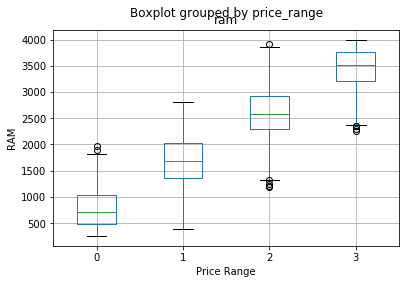

In [11]:
plt.figure(figsize=(20, 10))
data_treated.boxplot(column = 'ram', by = 'price_range')
plt.ylabel('RAM')
plt.xlabel('Price Range')

#### b. talk_time

Text(0.5, 0, 'Price Range')

<Figure size 1440x720 with 0 Axes>

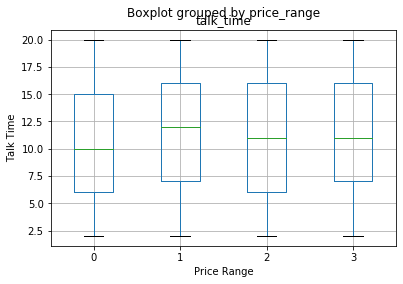

In [12]:
plt.figure(figsize=(20, 10))
data_treated.boxplot(column = 'talk_time', by = 'price_range')
plt.ylabel('Talk Time')
plt.xlabel('Price Range')

#### c. clock_speed

Text(0.5, 0, 'Price Range')

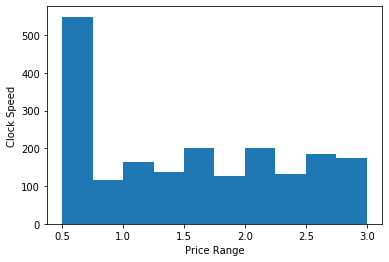

In [13]:
plt.hist(data_treated["clock_speed"])
plt.ylabel('Clock Speed')
plt.xlabel('Price Range')

#### d. dual_sim

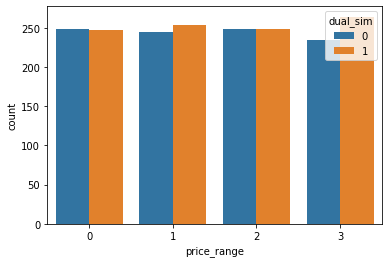

In [14]:
sns.countplot(x="price_range", hue = "dual_sim",data=data_treated)

## 3. Correlation matrix

#### 3. a

In [125]:
# Computing the correlation matrix with respect to the price range
correlation_matrix = data_treated.corr()[20::]
correlation_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
price_range,0.201768,0.018009,-0.006042,0.019325,0.027334,0.015254,0.044144,-0.00157,-0.03118,0.007159,...,0.150439,0.167571,0.916742,0.024294,0.037836,0.02081,0.023952,-0.031501,0.018434,1.0


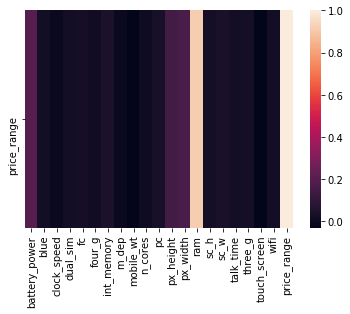

In [126]:
# Visualizing correlation matrix in the form of a heatmap
sns.heatmap(correlation_matrix)

#### 3. b.

The correlation values are the correlation coefficients of price_range will the other columns in the dataset. These coefficients are used to measure the strength of the relationship between the two variables. The coefficient values lie between -1 and 1, where values greater than 0 imply positive correlation, those less than 0 imply negative correlation and a value of 0 implies no correlation.

#### 3. c.

Positive sign implies a positive relationship between the two variables, that is, their values tend to move in the same direction.

Negative sign implies a negative relationship between the two variables, that is, their values tend to move in the opposite direction.

## 4. Training a Classifier

In [67]:
number_of_columns = len(data_treated.columns)
# Separating the features and the target variable
X = data_treated.iloc[:,0:number_of_columns-1]
y = data_treated.iloc[:,number_of_columns-1]

#### Classifier 1 - SVM

In [97]:
np.random.seed(0)
svc_classifier = SVC(kernel='linear', random_state=0)  
svc_classifier.fit(X, y) 
predicted_labels = svc_classifier.predict(X)
svc_accuracy = np.mean(predicted_labels == y)
print(svc_accuracy*100)

98.99396378269618


#### Classifier 2 - Random Forest

In [96]:
np.random.seed(0)
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=12, random_state=0)
rf_classifier.fit(X, y)
predicted_labels = rf_classifier.predict(X)
rf_accuracy = np.mean(predicted_labels == y)
print(rf_accuracy*100)

100.0


<b>Note:</b>  
<b>
- The question specifically mentions "training" and not the "test" accuracy, hence calculating accuracy on the training dataset. 

- In order to get the test accuracy, we can split the training dataset into train and test since we don't have labels in the test dataset. I have added the test accuracy computation as an addendum at the end of the notebook in case that is what the question is supposed to mean.
</b>

## 5. Comparing the training accuracy

We see that the training accuracy of random forest (100%) is better than that of SVM (98.99%). This might be because of the following reasons,
- For Random Forest, we have specified the max-depth as 12, which might lead to an overfitting on the training data as we are not limiting it to a lower depth
- In SVM, we are using a 'linear' kernel which is better suited when the classes are linearly separable, which migh not be the case here 
- SVM is better suited for two-class problems. In case of multiclass problems, it gets reduced to multiple two-class problems


## 6. Visualizing the predictions

In [115]:
# Importing the test dataset
test = pd.read_csv('test.csv')
# Removing the 'id' column as it is not required
test = test.iloc[:,1:,]
# Predicting on test dataset using the random forest classifier
predicted_labels = rf_classifier.predict(test)

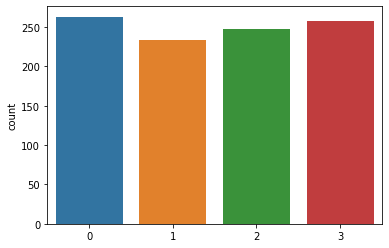

In [116]:
# Visualizing the predictions
sns.countplot(predicted_labels)

## Addendum - 4. Training a Classifier 

Adding this part because of the ambiguity explained in a note at the end of answer 4 above. 

In [94]:
np.random.seed(0)

# Creating the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

svc_classifier = SVC(kernel='linear', random_state=0)  
svc_classifier.fit(X_train, y_train) 
predicted_labels = svc_classifier.predict(X_test)
svc_accuracy = np.mean(predicted_labels == y_test)
print('svc_accuracy: ', svc_accuracy*100)

rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=12, random_state=0)
rf_classifier.fit(X_train, y_train)
predicted_labels = rf_classifier.predict(X_test)
rf_accuracy = np.mean(predicted_labels == y_test)
print('rf_accuracy: ', rf_accuracy*100)

svc_accuracy:  97.1830985915493
rf_accuracy:  85.3118712273642
